Random Forest Regression Metrics:
Mean Squared Error (MSE): 11.79
R² Score: 0.32

Feature Importance:
   Feature  Importance
0  minutes    0.659625
1  ratings    0.155909
3     year    0.115857
2    stars    0.068609

Cross-Validation Results:
Cross-Validation MSE: 12.87
Standard Deviation of CV Scores: 2.33


/var/folders/09/_ffptp312fj33qw8f8_zqqgc0000gn/T/ipykernel_30262/1570749213.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')


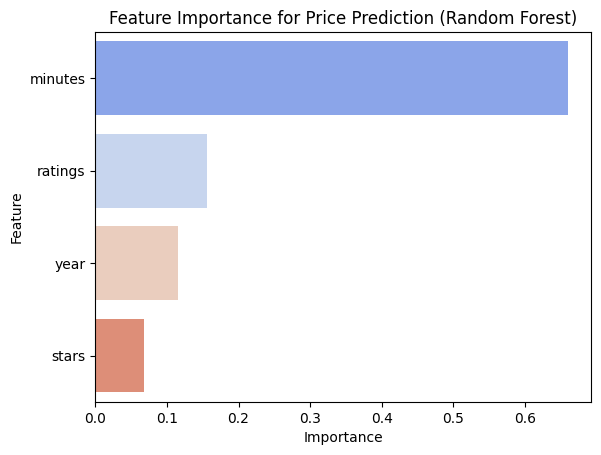

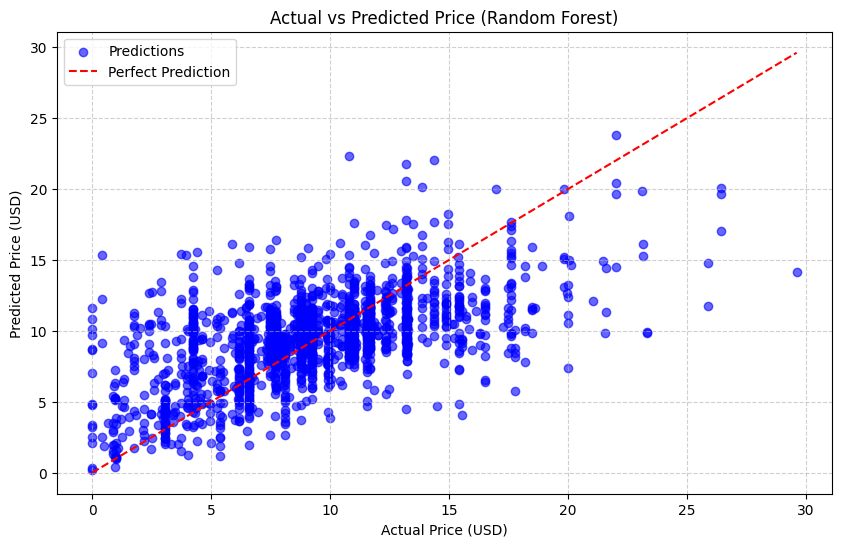

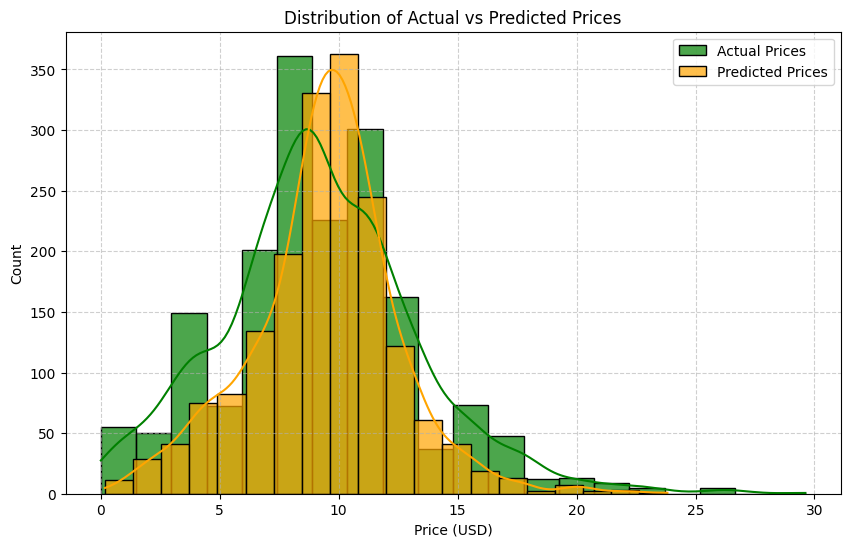

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
audible_df = pd.read_csv('audible_output.csv')

# --- Preprocessing ---
# Drop rows with missing values in critical columns
audible_df = audible_df.dropna(subset=['minutes', 'ratings', 'stars', 'price_usd'])

# Ensure numeric types for relevant columns
audible_df['minutes'] = pd.to_numeric(audible_df['minutes'], errors='coerce')
audible_df['ratings'] = pd.to_numeric(audible_df['ratings'], errors='coerce')
audible_df['stars'] = pd.to_numeric(audible_df['stars'], errors='coerce')
audible_df['price_usd'] = pd.to_numeric(audible_df['price_usd'], errors='coerce')
audible_df['year'] = pd.to_numeric(audible_df['year'], errors='coerce')

# --- Define Features and Target ---
# Select features and target for regression
X = audible_df[['minutes', 'ratings', 'stars', 'year']]
y = audible_df['price_usd']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- Evaluate the Model ---
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# --- Feature Importance ---
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# --- Cross-Validation ---
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_std = cv_scores.std()

print(f"\nCross-Validation Results:")
print(f"Cross-Validation MSE: {cv_mse:.2f}")
print(f"Standard Deviation of CV Scores: {cv_std:.2f}")

# --- Visualizations ---

# 1. Feature Importance Bar Chart
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title("Feature Importance for Price Prediction (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 2. Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.legend()
plt.grid(alpha=0.6, linestyle='--')
plt.show()

# 3. Distribution of Actual Prices in the Test Set
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=20, kde=True, color='green', label='Actual Prices', alpha=0.7)
sns.histplot(y_pred, bins=20, kde=True, color='orange', label='Predicted Prices', alpha=0.7)
plt.title("Distribution of Actual vs Predicted Prices")
plt.xlabel("Price (USD)")
plt.legend()
plt.grid(alpha=0.6, linestyle='--')
plt.show()
